#  Анализ оттока клиентов банка "Метанпром"

 ***Задача***

Проанализировать клиентов регионального банка и составить портрет клиентов, которые склонны уходить из банка.

***Описание датасета***

Датасет содержит данные о клиентах банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `сity` — город,
- `gender` — пол,
- `age` — возраст,
- `objects` — количество объектов в собственности,
- `balance` — баланс на счёте,
- `products` — количество продуктов, которыми пользуется клиент,
- `creditcard` — есть ли кредитная карта,
- `loyalty`  — лояльность,
- `estimated_salary` — заработная плата клиента,
- `churn` — ушёл или нет.

***Ход исследования***

1. Обзор и предоработка данных.
  
   1.1 Общий обзор данных.
   
   1.2 Проверка соответствия типов данных.
   
   1.3 Приведение названия колонок к общему стилю.
   
   1.4 Исследование и обработка пропусков.
   
   1.5 Проверка на дубликаты.
   
   
2. Исследовательский анализ данных.
 
   2.1 Построение графиков распределения признаков клиентов и диаграмм размаха. 
   
   2.2 Построение матрицы корреляции и вычисление коэффициента корреляции для нахождения взаимосвязи между признаками клиентов.
  
   2.3 Анализ клиентов в разрезе потребляемых продуктов.
   
   2.4 Анализ клиентов в разрезе возраста и пола.
   
   2.5 Анализ клиентов в разрезе наличи кредитной карты.
   
   2.6 Анализ клиентов в разрезе города, размера заработной платы.
   
   2.7 Анализ клиентов в разрезе баллов кредитного скоринга и количества потребляемых продуктов.
   
   2.8 Вывод.
   
   
3. Проверка гипотез.

   3.1 Гипотеза № 1.
   
   3.2 Гипотеза № 2.
   
 
4. Составление портрета клинетов которые склонны уходить. Общий вывод и рекомендации.

## Обзор и предобработка данных.

### Общий обзор данных.
  

In [1]:
#импортируем бибилиотеки
import pandas as pd
import seaborn as sns
from datetime import date

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display

from scipy import stats as st
import numpy as np
import math as mth
import plotly.express as px

from statsmodels.stats.proportion import proportions_ztest
import warnings
warnings.filterwarnings('ignore')

Прочитаем данные из датасета и сохраним их в переменную data. Выведем первые 15 строк и общую информацию методом info().

In [2]:
data = pd.read_csv('/datasets/bank_dataset.csv')
data.head(15)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
5,15616748,645,Рыбинск,М,44,8,113755.78,2,1,0,149756.71,1
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
7,15698884,376,Ростов Великий,Ж,29,4,115046.74,4,1,0,119346.88,1
8,15835101,501,Ярославль,М,44,4,142051.07,2,0,1,74940.50,0
9,15635125,684,Ярославль,М,27,2,134603.88,1,1,1,71725.73,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Изучив общую информацию можно сделать вывод о наличие пропусков в колонке Balance. Далее попробуем определить причину их возникновения.  Всего датасет содержит 11 колонок, и 1000 строк. Названия колонок не соотвествуют "хорошему стилю", необходимо это устранить.

### Проверка соответствия типов данных.

Изучив данные датасета можно сделать вывод о том, что типы данных находятся в соответствии. Менять ничего не будем.

### Приведение названия колонок к общему стилю.

Названия некоторых колонок начинаются с заглавной буквы, что не соотвествует "хорошему стилю". Исправим это.

In [4]:
#приведем названия столбцов к нижнему регистру 
data.columns = data.columns.str.lower()

# Названия из столбцов из двух и более слов должны быть написаны через ниженне подчеркивание 
data = data.rename(columns={'creditcard': 'credit_card', 'userid' : 'user_id'})
data

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


### Исследование и обработка пропусков.

При первичном знакомстве с данными мы обнаружили наличие пропусков в колонке Balance. Выясним есть ли какая то закономерность появления пропусков. Выведим таблицу data в срезе клиентов с отсутсвующим балансом и проанализируем ее.

Добавим новый столбец в котором клиенты, имеющие баланс, будут иметь значение 1, а не имеющие 0. Сгруппируем по этому столбцу, посмотрим на средние занечение всех параметров чтобы выявить взаимосвязь.

In [5]:
def balance_existence(balance):
    if balance > 0:
        return 1
    return 0
data['balance_existence'] = data['balance'].apply(balance_existence)
data.groupby('balance_existence').mean()

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
balance_existence,,,,,,,,,,
0,1.573469e+07,649.452861,38.434891,5.071330,NaN,1.784628,0.716616,0.517832,98983.559549,0.138236
1,1.573310e+07,651.138493,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240796


Изучив средние значения признаков клиентов с балансом и без, значимых отличий не выявленно. 

балл кредитного скоринга: 649 - 651,

средний возраст: 38-39 лет,
    
количество продуктов банка 1,3 - 1,7,

количество объектов в собственности - около 5,

средняя зарплата 98 - 100 тысяч.

Пропуск может быть, если клиент не имеет дебетовой карты, тогда наличие пропуска вполне объяснимо.

In [6]:
#проанализируем пользователей у которых отсутсвует информация о балансе

data_no_balans = data.query('balance_existence == 0')

# Посмотрим сколько в среденм в каждом городе таких клиентов
data_no_balans.pivot_table(columns = "city", values='user_id', aggfunc='count')


city,Рыбинск,Ярославль
user_id,1199,2418


Получаем что в Ростове Великом нет клиентов с отсуствующим балансом, а вот в Ярославле их в два раза больше чем в Рыбинске.

In [7]:
# исследуем тех же клиентов в разрезе количества продуктов банка
data_no_balans.pivot_table(columns = "products", values='user_id', aggfunc='count')

products,1,2,3,4
user_id,905,2600,98,14


Клинты с остуствующим балансом чаще всего используют два банковских продукта. Так как мы точно знаем, что все клиенты имеют кредитную карту, можно предположить, что возможно второй продукт является дебетовой каротой.

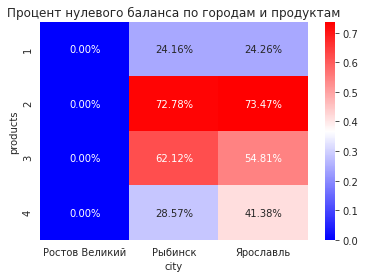

In [38]:
# построим тепловую карту и посмотрим процент нулевого баланса по городам и продуктам
sns.heatmap(
    data.pivot_table(
        index='products', 
        columns='city', 
        values='balance', 
        aggfunc=lambda row: row.isna().mean()), 
    annot=True, 
    fmt='.2%',
    cmap="bwr")\
   .set(title="Процент нулевого баланса по городам и продуктам");

### Проверка на дубликаты.

In [9]:
print('Явные дубликаты:', data.duplicated().sum())

Явные дубликаты: 0


Явных дубликатов не выявленно. Проверим на наличие дубликатов колонки userid и сity

In [10]:
print("Количество уникальных значений в столбце user_id:", data['user_id'].value_counts().count())

Количество уникальных значений в столбце user_id: 10000


In [11]:
print("Список уникальных значений в столбце сity:", data['city'].unique())

Список уникальных значений в столбце сity: ['Ярославль' 'Рыбинск' 'Ростов Великий']


Дубликатов не выявленно

## Исследовательский анализ данных.
### Построение графиков распределения признаков клиентов.

Построим гистограммы распределения значений для колонок: score, age, balance, objects, estimated_salary.

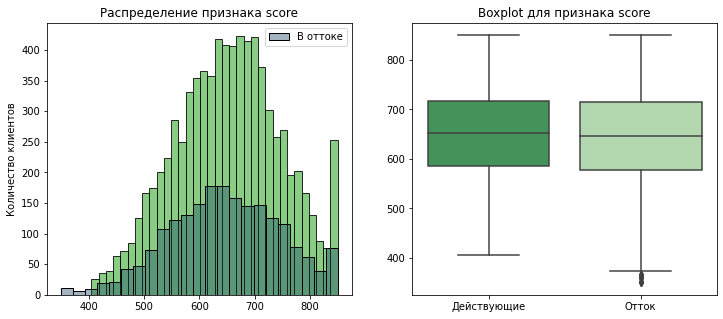

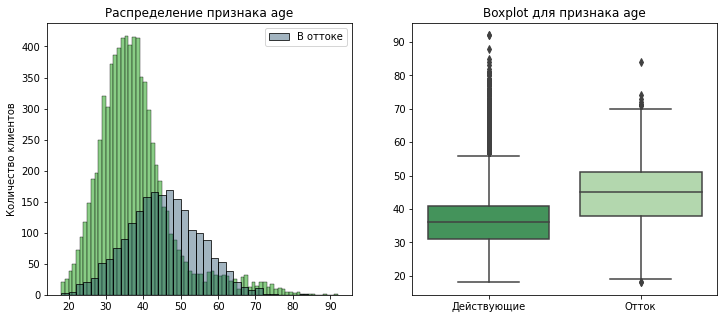

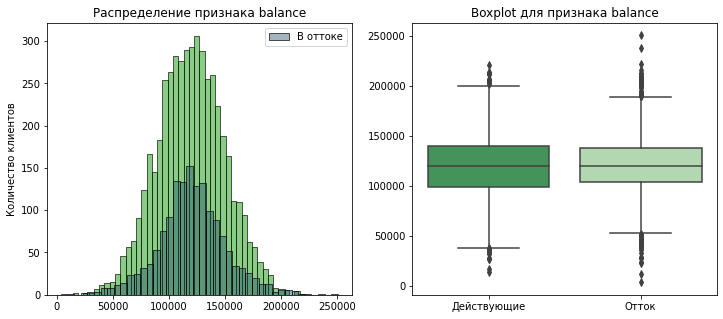

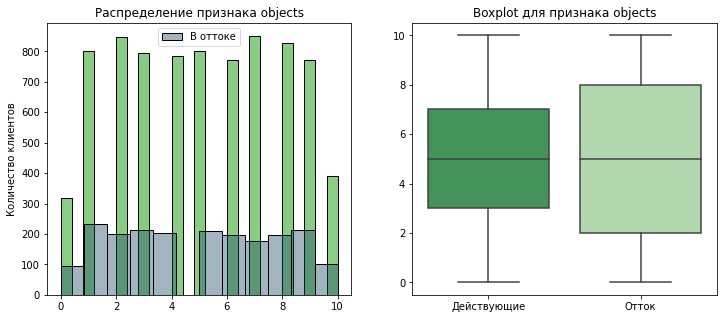

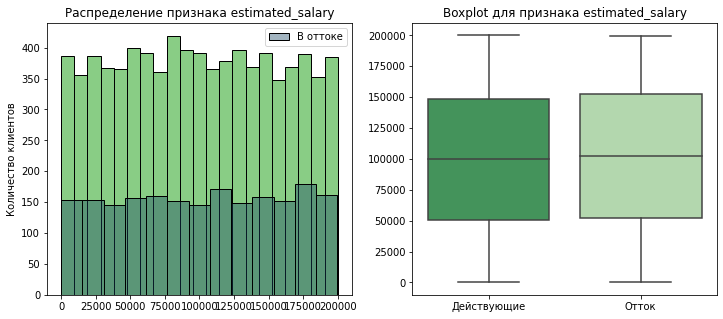

In [12]:
# Функция для отрисовки гистограмм и боксплота для визуализации распределения.
def plot(data, column):
    
    fig, ax = plt.subplots(figsize = (12, 5))
    
    sns.histplot(data[data['churn']==0][column], color = '#61bd5c', ax = plt.subplot(1, 2, 1))
    sns.histplot(data[data['churn']==1][column], label = 'В оттоке', color = '#184562', ax = plt.subplot(1, 2, 1), alpha=.4)
    plt.xlabel('')
    plt.ylabel('Количество клиентов')
    plt.legend()
    plt.title("Распределение признака {}".format(column)) 
    
    sns.boxplot(y = column, x = 'churn', data = data, ax = plt.subplot(1, 2, 2), palette='Greens_r') 
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(np.arange(2), ('Действующие', 'Отток'))
    plt.title("Boxplot для признака {}".format(column))
   
    plt.show()
    
#в функцию передадим список числовых признаков
    
list = ['score', 'age', 'balance', 'objects', 'estimated_salary']

for column in list:
    plot(data, column)

Построим гистограммы распределения значений для колонок: city, gender, products, credit_card, loyalty, churn.

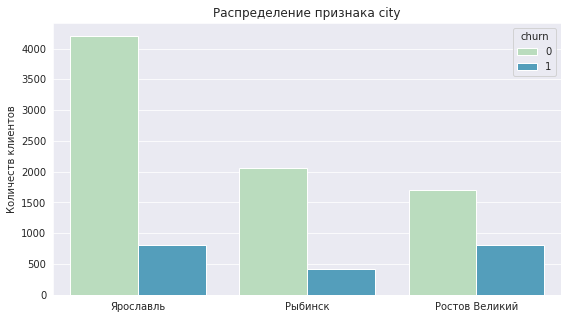

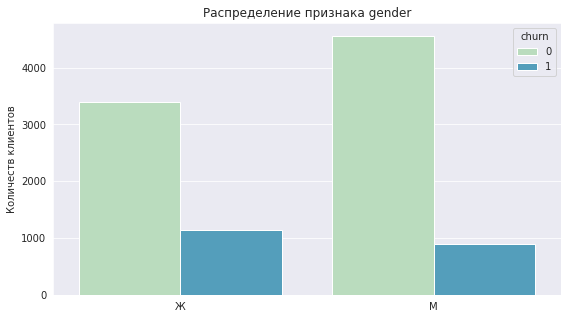

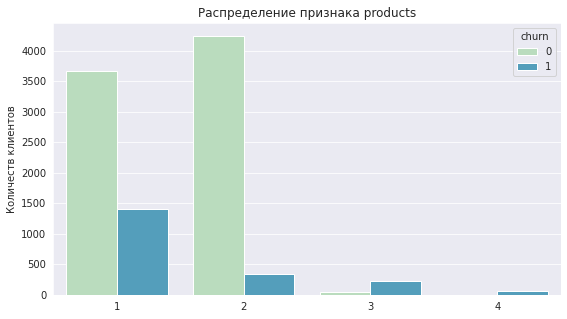

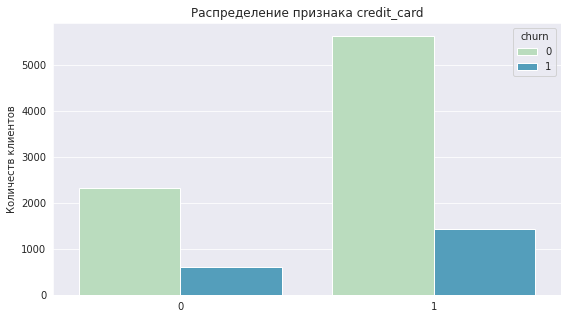

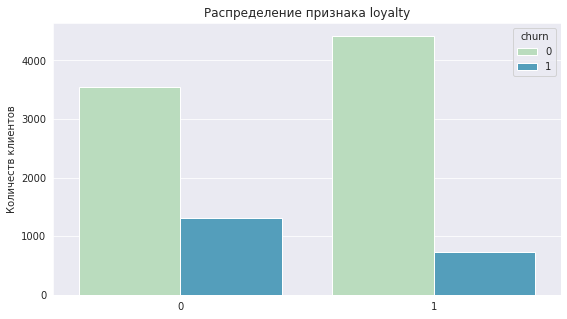

In [13]:
def categorical(data, column):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize = (20, 5))
    sns.countplot(x = column, hue = 'churn', data = data, ax = plt.subplot(1, 2, 1),  palette='GnBu')
    plt.ylabel('Количеств клиентов')
    plt.xlabel('')
    plt.title("Распределение признака {}".format(column)) 
    plt.show()
    
#в функцию передадим список категориальных признаков
    
list = ['city', 'gender', 'products', 'credit_card', 'loyalty']

for column in list:
    categorical(data, column)    
    

По данным графикам можно сделать вывод что:

оттоку чаще подвержены клинты в возрасте от 45 - 50 лет;

меньше всего клиентов уходят в отток в городе Рыбинск;

чаще всего это женщины;

клиенты в оттоке пользуются одним продуктом банка;

такие клиенты чаще всего не имеют кредитную карту, и не проявляют активность.

клиенты имеющие 3 - 4 продукта почти 100 % поппадют в отток

### Построение матрицы корреляции и вычисление коэффициента корреляции для нахождения взаимосвязи между признаками клиентов.

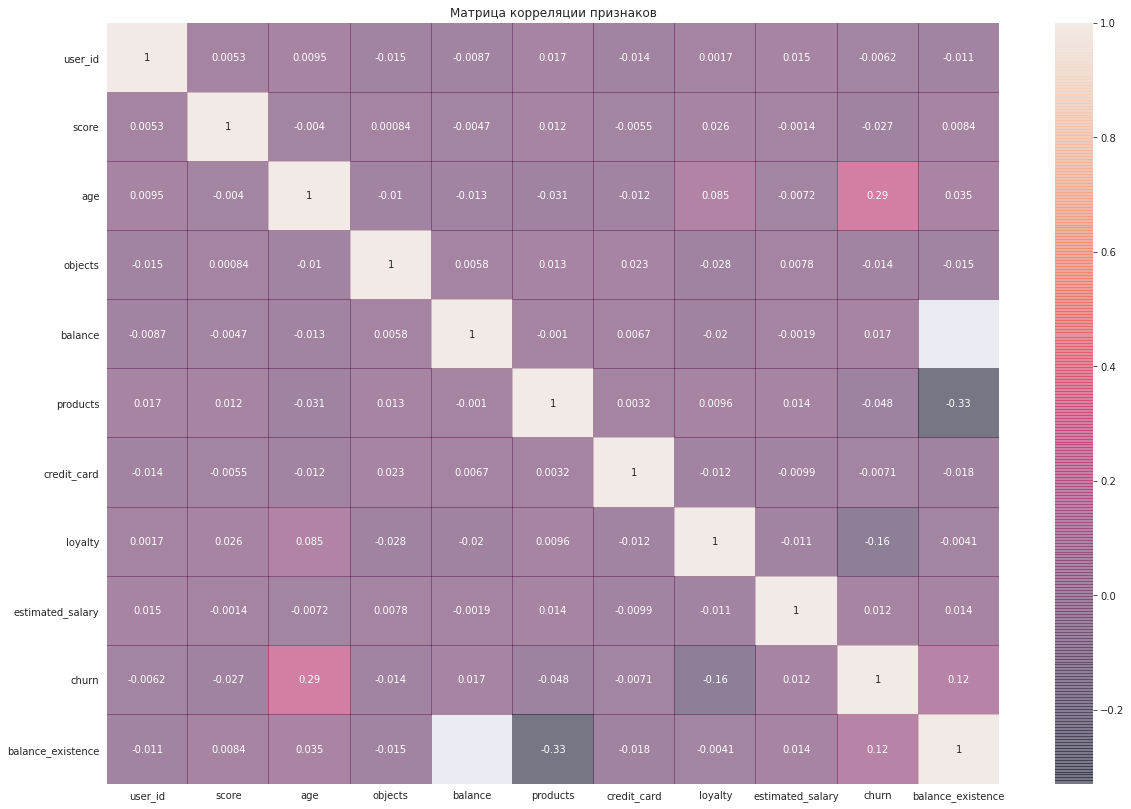

In [14]:
fig, ax = plt.subplots(figsize=(20,14))

sns.heatmap(data.corr(), annot=True, alpha=.5)
ax.set_title('Матрица корреляции признаков')
plt.show()

Изучив матрицу корреляции можно сказать, что на отток в небольшой степени влияет возраст клиента, так же небольшое влияние имеет параметр лояльности, клиенты с отсувующей лояльностью больше склонны к оттоку. 
Но серьезной связи между признаками нет.
По шкале Чеддока полученую корреляцию можно назвать слабой.

Для изучения нелинейной зависмоти между параметрами построим 𝜙 k корреляционную матрицу

### Анализ клиентов в разрезе потребляемых продуктов.

Посмотрим как распределяются клиенты в зависимости от количества потребляемых продуктов банка.

In [15]:
data_product = data.groupby(['products', 'churn'])['user_id'].agg('count').reset_index()
data_product

,products,churn,user_id
0,1,0,3675
1,1,1,1409
2,2,0,4242
3,2,1,348
4,3,0,46
5,3,1,220
6,4,1,60


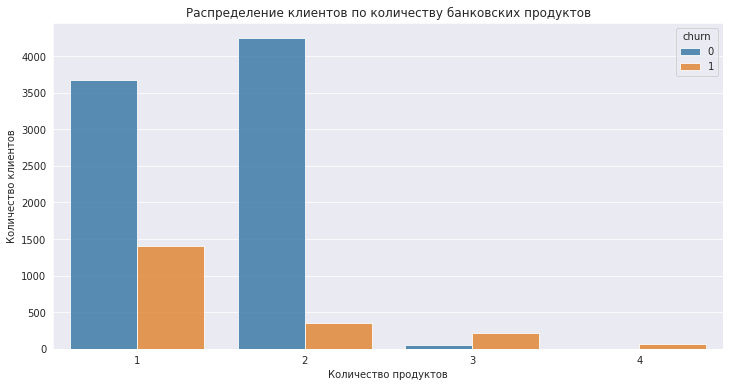

In [16]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='products', y='user_id', hue = 'churn', data=data_product, alpha=0.8)
ax.set_title('Распределение клиентов по количеству банковских продуктов')
ax.set_xlabel('Количество продуктов')
ax.set_ylabel('Количество клиентов')
plt.show()

Действующие клиенты предпочитают пользоваться чаще 2 продуктами, чуть реже 1. Клиенты в оттоке чаще пользуются 1 продуктом. Интересная особенность, что нет действующих клиентов, пользующихся 4 продуктами.

### Анализ клиентов в разрезе возраста и пола.
 
 Первым делом разобьем клиентов на возрастные категории. Посмотрим какие максимальные и минимальные значения возрата имеются у клиентов.


In [17]:
print("Минимальный возраст клиента", data['age'].min())
print("Максимальный возраст клиента", data['age'].max())

Минимальный возраст клиента 18
Максимальный возраст клиента 92


In [18]:
#Разобъем этот интервал на группы: 
    #1 группа - от 18 до 30 лет; 
    #2 группа от 31 до 40 лет;
    #3 группа от 41 до 50 лет;
    #4 группа от 51 до 60 лет;
    #5 группа от 61 до 70 лет;
    #6 группа от 71 и старше.

def category_age (data):
    
    if 18 <= data['age'] <= 30:
        return '18-30'
    
    elif 30 < data['age'] <= 40:
        return '31-40'
    
    elif 40 < data['age'] <= 50:
        return '41-50 '
        
    elif 50 < data['age'] <= 60:
        return '51-60 '
    
    elif 60 < data['age'] <= 70:
        return '61-70 '
    
    else:
        return '71 и старше'

#добавим новый столбец category_age в таблицу data

data['category_age'] = data.apply(category_age, axis=1)

data.head(5)


,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_existence,category_age
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0,41-50
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1,41-50
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1,41-50
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0,31-40
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1,41-50


Посмотрим на средний уровень оттока по возрастному и половому признакам.

In [19]:
data_age = data.pivot_table(index='category_age',columns='gender', values='churn',aggfunc='mean')
data_age


gender,Ж,М
category_age,,
18-30,0.098864,0.056066
31-40,0.155692,0.093499
41-50,0.389091,0.295082
51-60,0.652174,0.475369
61-70,0.387755,0.255435
71 и старше,0.106061,0.059701


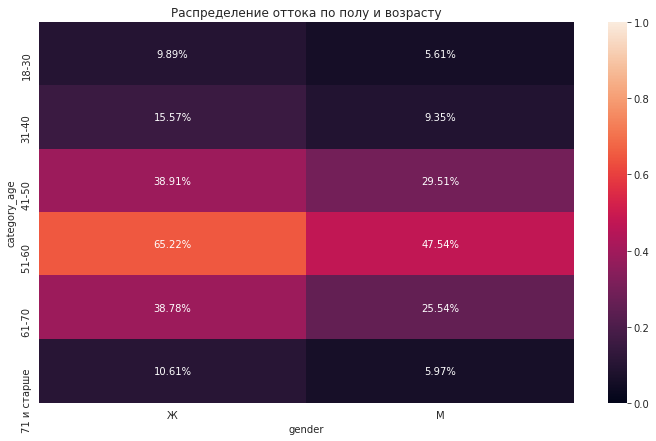

In [20]:
plt.figure(figsize=(12, 7))
sns.heatmap(data_age, annot=True, fmt='.2%',vmin=0, vmax=1)
plt.title('Распределение оттока по полу и возрасту')
plt.show()

Больше всего оттоку подвержены женщины после 56 лет.

### Анализ клиентов в разрезе наличия кредитной карты.

In [21]:
data_cc = data.groupby(['credit_card', 'churn'])['user_id'].agg('count').reset_index()

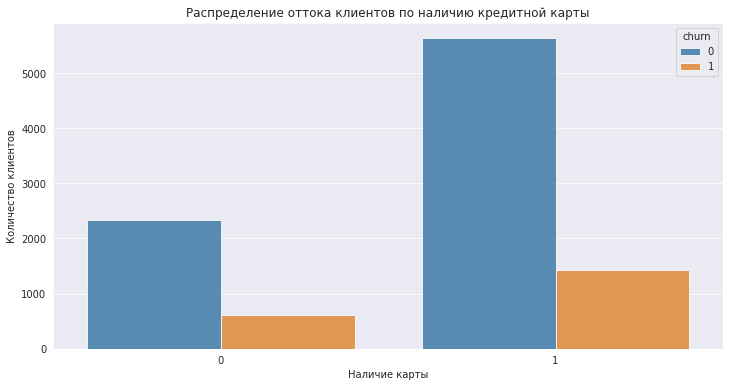

In [22]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='credit_card', y='user_id', hue = 'churn', data=data_cc, alpha=0.8)
ax.set_title('Распределение оттока клиентов по наличию кредитной карты')
ax.set_xlabel('Наличие карты')
ax.set_ylabel('Количество клиентов')
plt.show()

Как видно, наличие кредитной карты не является сдерживающим фактором. Клиенты уходят как с ней, так и без неё.

### Анализ  клиентов в разрезе города и размера заработной платы.

Как и с возрастом определим максимальные и минимальные значения и разобъем весь интервал на группы.


In [23]:
print("Минимальная заработная плата", data['estimated_salary'].min())
print("Максимальная заработная плата", data['estimated_salary'].max())

Минимальная заработная плата 11.58
Максимальная заработная плата 199992.48


Минимальная зарплата в 11 рублей выглядит очень подозрительно, возможно возник сбой в данных при загрузке или ошибка при введении данных. Примем минимальный размер оплаты труда в 13000 тыс. рублей и разобъем на категории, где:

до 40000 руб. - низкая,

от 41000 до 100000 - средняя,

свыше 100000 - высокая заработная плата.

In [24]:
def category_salary (data):
    
    if data['estimated_salary'] <= 40000:
        return 'низкая'
    
    elif 41000 <= data['estimated_salary'] <= 100000:
        return 'средняя'
    
    else:
        return 'высокая'

#добавим новый столбец category_salary в таблицу data

data['category_salary'] = data.apply(category_salary, axis=1)

data.head(5)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_existence,category_age,category_salary
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0,41-50,высокая
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1,41-50,высокая
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1,41-50,высокая
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0,31-40,средняя
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1,41-50,средняя


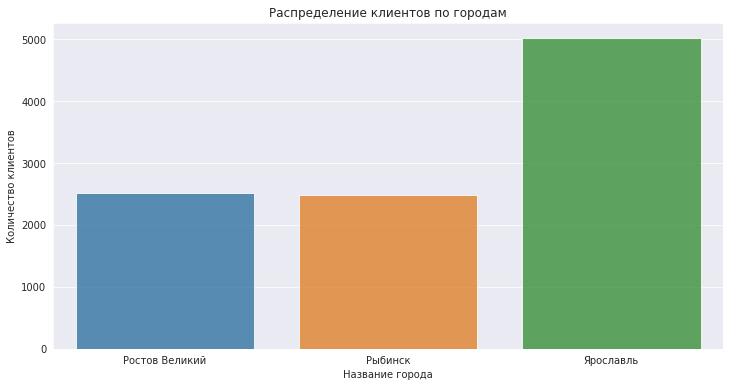

In [25]:
# как клиенты распределены по городам
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='city', y='user_id', data=data.groupby('city')['user_id'].count().reset_index(), alpha=0.8)
ax.set_title('Распределение клиентов по городам')
ax.set_xlabel('Название города')
ax.set_ylabel('Количество клиентов')
plt.show()

В Ярославле проживает в два раза больше клиентов, чем в остальных городах.

In [26]:
# Проанализиурем уровень оттока клиентов в разрезе города и категории заработной платы
data_salary =  data.pivot_table(index='category_salary',columns='city', values='churn',aggfunc='mean')

data_salary

city,Ростов Великий,Рыбинск,Ярославль
category_salary,,,
высокая,0.310612,0.178543,0.168656
низкая,0.346392,0.156057,0.152594
средняя,0.334243,0.153846,0.155570


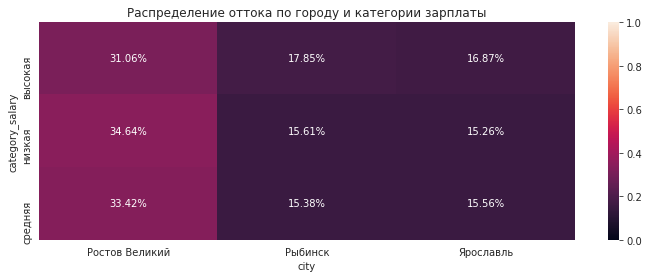

In [27]:
plt.figure(figsize=(12, 4))
sns.heatmap(data_salary, annot=True, fmt='.2%',vmin=0, vmax=1)
plt.title('Распределение оттока по городу и категории зарплаты')
plt.show()

Можно сделать предварительный вывод, что географическое положение сильно влияет  на отток клиентов, а вот размер заработной платы имеет менее выраженное влияние. Больше всего в отток уходят жители Ростова Великого с низкой зарплатой.

### Анализ клиентов в разрезе балоов кредитного скоринга и количества потребляемых продуктов

 Определим максимальный и минимальный баллы


In [28]:
print("Минимальный балл кредитного скоринга", data['score'].min())
print("Максимальный балл кредитного скоринга", data['score'].max())

Минимальный балл кредитного скоринга 350
Максимальный балл кредитного скоринга 850


Распределим баллы на три категории: от 350 до 450 низкий балл; от 451 до 650 средний балл; от 651 до 850 высокий балл. Создадим колонку с категорией балла.

In [29]:
def category_score(data):
    
    if data['score'] <= 450:
        return 'низкий балл'
    
    elif 450 < data['score'] <= 650:
        return 'средний балл'
    
    else:
        return 'высокий балл'

#добавим новый столбец category_salary в таблицу data

data['category_score'] = data.apply(category_score, axis=1)

data.head(5)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,balance_existence,category_age,category_salary,category_score
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1,0,41-50,высокая,средний балл
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0,1,41-50,высокая,средний балл
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1,1,41-50,высокая,средний балл
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0,0,31-40,средняя,высокий балл
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0,1,41-50,средняя,высокий балл


In [30]:
# Проанализиурем уровень оттока клиентов в разрезе города и категории заработной платы
data_score =  data.pivot_table(index='category_score',columns='products', values='churn',aggfunc='mean')

data_score

products,1,2,3,4
category_score,,,,
высокий балл,0.268073,0.069510,0.787879,1.0
низкий балл,0.432692,0.115385,1.000000,1.0
средний балл,0.280050,0.081218,0.861538,1.0


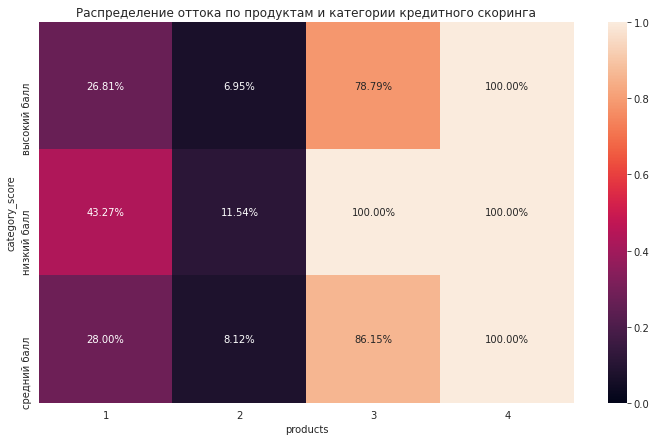

In [31]:
plt.figure(figsize=(12, 7))
sns.heatmap(data_score, annot=True, fmt='.2%',vmin=0, vmax=1)
plt.title('Распределение оттока по продуктам и категории кредитного скоринга')
plt.show()

Действующих клиентов с 4 и 3 продуктами анализировать сложно, так как их количество достаточно мало.  Можно сказать, что среди клиентов с тремя продуктами самый высокий отток у тех, кто имеет низкий балл кредитного скоринга. А вот группа клиенты с 1 и 2 продуктами самые большие. И самый большой отток у клиентов с 1 продуктом и низким баллом кредитного скоринга.  

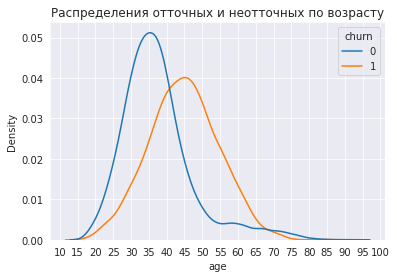

In [39]:
# Распределения отточных и неотточных по возрасту
ax = sns.kdeplot(data = data, x = 'age', hue = 'churn', common_norm=False)
import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.set(title="Распределения отточных и неотточных по возрасту");

### Вывод


Можно выделить несколько признаков клиентов, которые сильно влияют на отток:
1. больше всего на отток влияет пол и возраст: чаще всего в отток уходят женщины после 50 - 55 лет.
2. город проживания также влияет на отток, так в Ростове Великом отток почти в два раза выше, чем в остальных городах от 31 до 34,6 % в зависимости от уровня зарплаты. В Ярославле, который является лидером по количеству клиентов, отток всего 15 - 16,8 %.
3. Категория клиентов с низким баллом кредитного скоринга и использующие только 1 банковский продукт так же имеют высокий отток.

## Проверка гипотез.
### Гиптеза № 1.

Проверьте гипотезу различия дохода между теми клиентами, которые ушли и теми, которые остались.

**НО(нулевая гипотеза):** Средний доход у клиентов, ушедших в отток и действующих клиентов одинаковые.

**Н1(альтернативная гипотеза):** Средний доход у клиентов, ушедших в отток и действующих клиентов разные.

Проверим данные на нормальность.

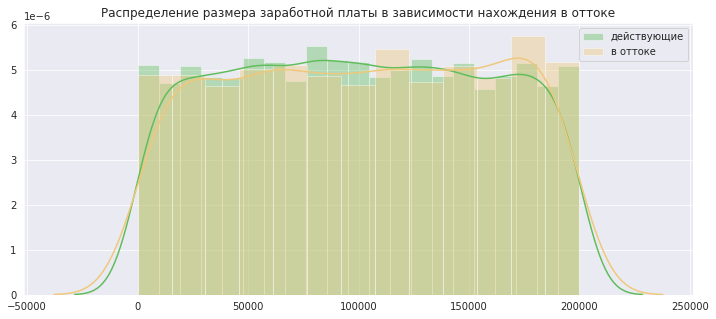

In [33]:
plt.figure(figsize=(12, 5))

sns.distplot(data[data['churn'] == 0]['estimated_salary'], color = '#61bd5c', label = 'действующие')
sns.distplot(data[data['churn'] == 1]['estimated_salary'], color = '#EFC87B', label = 'в оттоке')

plt.title('Распределение размера заработной платы в зависимости нахождения в оттоке')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Можно сказать, что данные распределены не нормально. Теперь проверим равны ли дисперсии двух выборок.

In [34]:
#  Проверим равенство дисперсий методоv Левена

import numpy as np
from scipy.stats import levene

alpha = 0.05
a = data[data['churn'] == 0]['estimated_salary']
b = data[data['churn'] == 1]['estimated_salary']

stat, p = levene(a, b, center='median')

if p < alpha:
    print(p, 'Отвергаем нулевую гипотезу дисперсии не равны')
else:
    print(p, 'Не получилось отвергнуть нулевую гипотезу дисперсии равны')

0.3379824239075462 Не получилось отвергнуть нулевую гипотезу дисперсии равны


Для подтверждения гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам иcпользуется метод st.stats.ttest_ind.
Если p-value будет меньше выбранного уровня значимости a = 0.05, то нулевую гипотезу о равенстве средних отвергнем. В противном случае делаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

In [35]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind(data[data['churn'] == 0]['estimated_salary'], 
                             data[data['churn'] == 1]['estimated_salary'], equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу ')

0.22892461305145798
0.22892461305145798 Не получилось отвергнуть нулевую гипотезу 


Не получилось отвергнуть нулевую гипотезу, значит нет оснований утверждать, что доходы у клиентов, ушедших в отток и действующих клиентов разные. 

### Гипотеза № 2.


Проверим гипотезу о разнице кредитного скоринга между действующими клиентами и клиентами, ушедшими в отток.

**НО(нулевая гипотеза):** Средний Кредитный скорринг у клиентов, ушедших в отток и действующих клиентов одинаковые.

**Н1(альтернативная гипотеза):** Средний Кредитный скорринг у клиентов, ушедших в отток и действующих клиентов разные.

Проверим данные на нормальность.

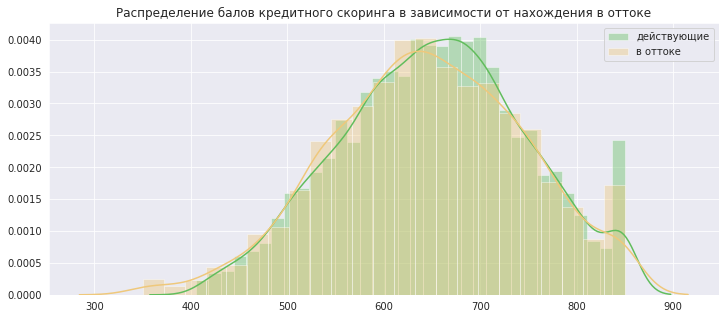

In [36]:
plt.figure(figsize=(12, 5))

sns.distplot(data[data['churn'] == 0]['score'], color = '#61bd5c', label = 'действующие')
sns.distplot(data[data['churn'] == 1]['score'], color = '#EFC87B', label = 'в оттоке')

plt.title('Распределение балов кредитного скоринга в зависимости от нахождения в оттоке')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

Данные распределены нормально.

In [37]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind(data[data['churn'] == 0]['score'], 
                             data[data['churn'] == 1]['score'], equal_var=False)
# alpha = задайте значение уровня значимости
alpha = 0.05
# вывод значения p-value на экран 
print(results.pvalue)
# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print(results.pvalue, 'Отвергаем нулевую гипотезу')
else:
    print(results.pvalue, 'Не получилось отвергнуть нулевую гипотезу ')

0.008464728991832862
0.008464728991832862 Отвергаем нулевую гипотезу


В результате проверки гипотезы отвергли нулевую гипотезу, а значит есть сатистически значимая разница между баллами кредитного скоринга для действующих клиентов и клиентов, ушедших в отток.

## Составление портрета клиентов, которые склонны уходить. Общий вывод и рекомендации.

Исходя из проведенного анализа можно составить портрет пользователя, склонного к оттоку. Это клиент:

 - в возрасте от 51 до 60 лет.
 - чаще всего это женщины, чем мужчины.
 - клиенты с 3 и 4 продуктами банка имеют почти 100 % отток, также достаточно высокий отток у клиентов с 1 продуктом.
 - клиенты в оттоке имеют низкий балл кредитного скоринга.
 - в сравнении трех городов - Ярославля и областных городов Ростова Великого и Рыбинска больше всего клиентов в оттоке в городе Ростов Великий.
 - 3/4 таких клиентов имеют кредитную карту.
 - клиенты имеют около 5 объектов в собственности.
 - клиенты с низким баллом кредитного скоринга
 
Характеристики дейтвующего клиента:
 
 
 - Самый низкий отток это клиенты от 18 - 30 лет.
 - у мужчин почти в 2 раза ниже чем у женщин.
 - Это клиенты испльзующие 2 продукта банка.
 - Имеют высокий балл кредитного скоринга.
 - Больше всего таких клиентов городе Ярославле
 - Большая их часть являются держателями кредтной карты данного банка.
 
 
 **РЕКОМЕНДАЦИИ**
 
 Исходя из портрета клиента, склонного к оттоку, необходимо провести следующие мероприятия:
 
 1. Проанализировать качество поставляемых продуктов и услуг в городе Ростов Великий.
 2. Разработать новые интересные предложения для клиентов пенсионного и предпенсионного возраста, в частности которые бы заинтересовали женщин. Возможно, акции кешбэка на покупки в аптеках и продуктовых магазинах.
 3. Обратить внимание на клиентов, у которых нет данных о балансе. Скорее всего эти клиенты обслуживаются в других банках. Изучить предложения конкурентов и поработать свои программы для привлечения клиентов
 



Ссылка на презинтацию: https://disk.yandex.ru/i/8ECWZFrGgQjUHQ